In [51]:
import pandas as pd
df = pd.read_csv('./Final_Datset/city_day.csv')

In [52]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [54]:
cols = df.columns
cols

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [55]:
cols_to_fill = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene','AQI']

In [56]:
for col in cols_to_fill:
    df[col] = df[col].fillna(df[col].median())

In [57]:
df['AQI_Bucket'].unique()

array([nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

In [58]:
df['Air_Quality'] = df['AQI_Bucket'].fillna('Moderate')
df.drop('AQI_Bucket',axis=1,inplace =True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         29531 non-null  object 
 1   Date         29531 non-null  object 
 2   PM2.5        29531 non-null  float64
 3   PM10         29531 non-null  float64
 4   NO           29531 non-null  float64
 5   NO2          29531 non-null  float64
 6   NOx          29531 non-null  float64
 7   NH3          29531 non-null  float64
 8   CO           29531 non-null  float64
 9   SO2          29531 non-null  float64
 10  O3           29531 non-null  float64
 11  Benzene      29531 non-null  float64
 12  Toluene      29531 non-null  float64
 13  Xylene       29531 non-null  float64
 14  AQI          29531 non-null  float64
 15  Air_Quality  29531 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [60]:
city_wise_AQI = df[['City','AQI']].groupby(['City']).median().sort_values(['AQI']).reset_index()

In [61]:
city_wise_AQI.head()

,City,AQI
0,Aizawl,24.0
1,Thiruvananthapuram,69.0
2,Shillong,69.5
3,Coimbatore,77.5
4,Chandigarh,83.0


In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

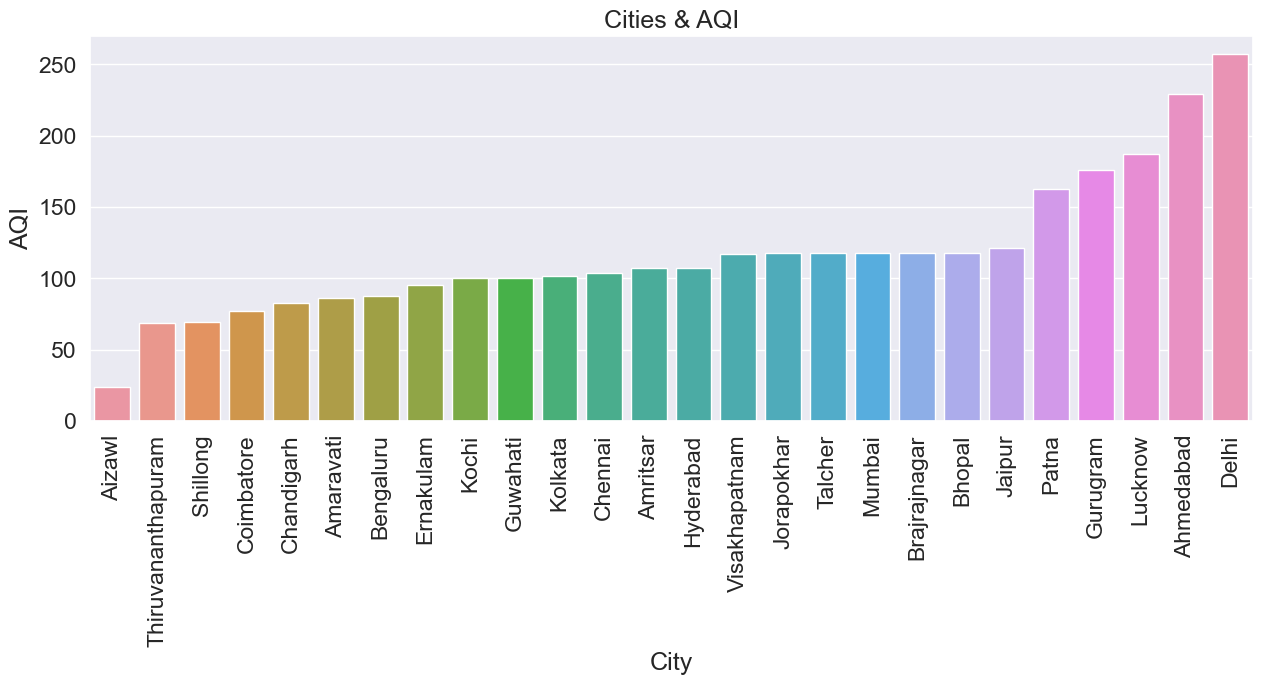

In [63]:
plt.figure(figsize=(15,5))
sns.set(font_scale=1.5)
sns.barplot(x='City', y='AQI', data=city_wise_AQI).set(title ='Cities & AQI')
plt.xticks(rotation=90)
plt.show()

* **On Average, Aizwal has been the city with the best AQI and Delhi, Ahmedabad, Lucknow have very poor AQ-indices.**

In [64]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['year'] = df['Date'].dt.year
df['month'] =df['Date'].dt.month
df.drop('Date',axis=1,inplace=True)

In [65]:
df['year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [66]:
df.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_Quality,year,month
0,Ahmedabad,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,Moderate,2015,1
1,Ahmedabad,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,Moderate,2015,1
2,Ahmedabad,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0,Moderate,2015,1
3,Ahmedabad,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0,Moderate,2015,1
4,Ahmedabad,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0,Moderate,2015,1


In [67]:
x1 = df[['City','AQI','year']].groupby(['City','year']).median().sort_values(['AQI']).reset_index()


In [68]:
x1.head()

,City,year,AQI
0,Aizawl,2020,24.0
1,Amaravati,2020,54.0
2,Thiruvananthapuram,2020,64.0
3,Shillong,2020,65.0
4,Thiruvananthapuram,2017,68.0


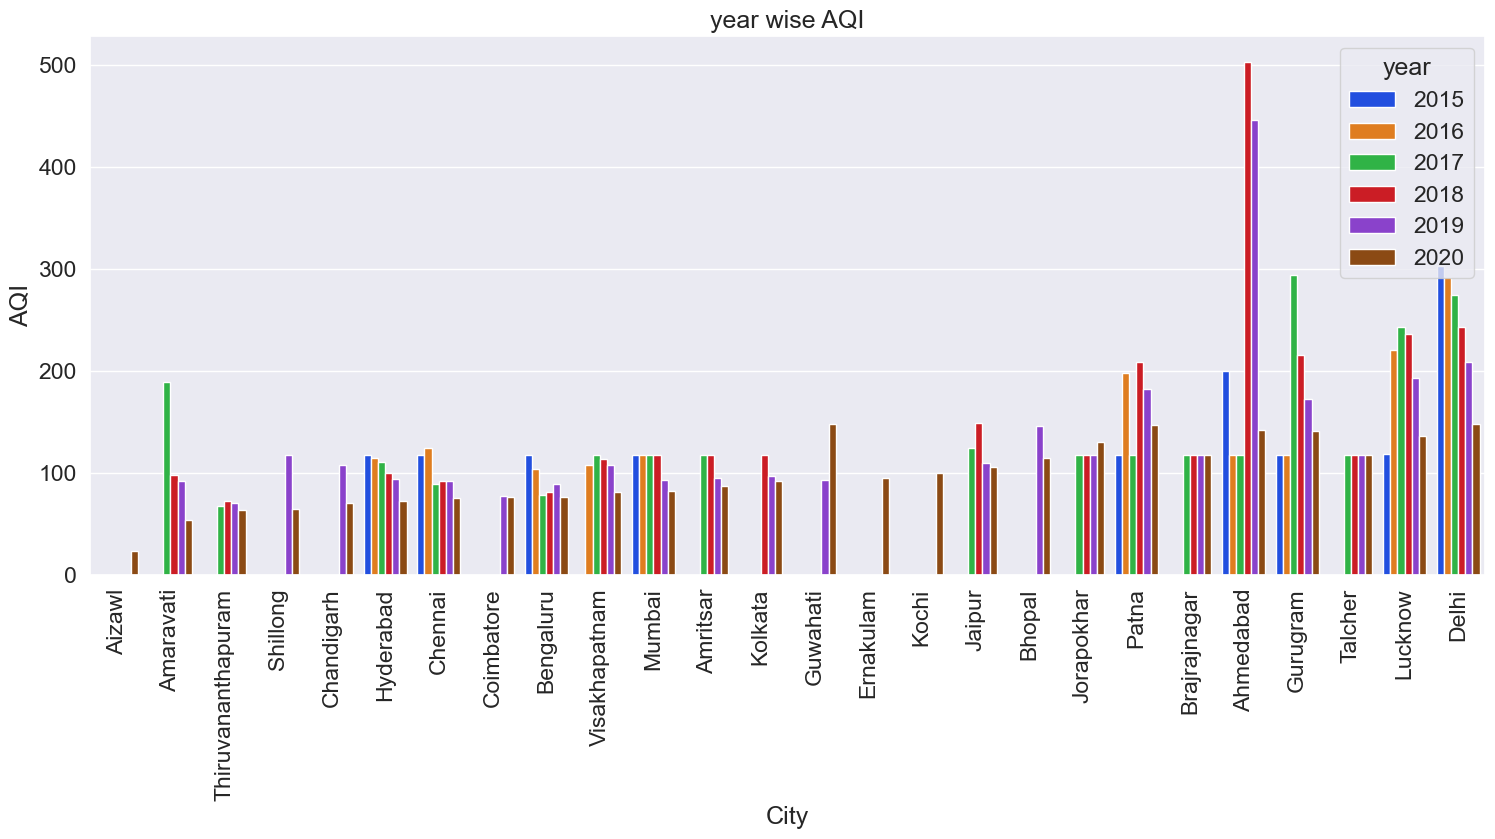

In [69]:

plt.figure(figsize=(18,7))
sns.set(font_scale=1.5)
sns.barplot(x='City', y='AQI', data=x1,hue='year',palette='bright').set(title ='year wise AQI')
plt.xticks(rotation=90)
plt.show()



**The plot shows a huge spike in the AQI for the city of Ahmedabad during the years 2018 & 2019.**

**Majority of this is coming from Power plant exhaust, Road dust and transport.**


In [70]:
df.head(2)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_Quality,year,month
0,Ahmedabad,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,Moderate,2015,1
1,Ahmedabad,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,Moderate,2015,1


In [71]:
import numpy as np
month_wise = df.groupby(['City','month']).agg(
    AQI = pd.NamedAgg(column = 'AQI',aggfunc = np.mean))
month_wise.reset_index(inplace = True)

In [72]:
month_wise.head()

,City,month,AQI
0,Ahmedabad,1,346.172043
1,Ahmedabad,2,447.894118
2,Ahmedabad,3,380.129032
3,Ahmedabad,4,295.305556
4,Ahmedabad,5,216.392473


In [73]:
df[df['City']=='Ahmedabad'].sort_values('AQI',ascending=False).head()[['City','AQI']]

,City,AQI
1145,Ahmedabad,2049.0
1136,Ahmedabad,1917.0
560,Ahmedabad,1842.0
1048,Ahmedabad,1747.0
1463,Ahmedabad,1719.0


**The AQI for Ahmedabad is fishy, AQI anywhere more than 500 means that things are pretty much worse.(Could be a mistake).**

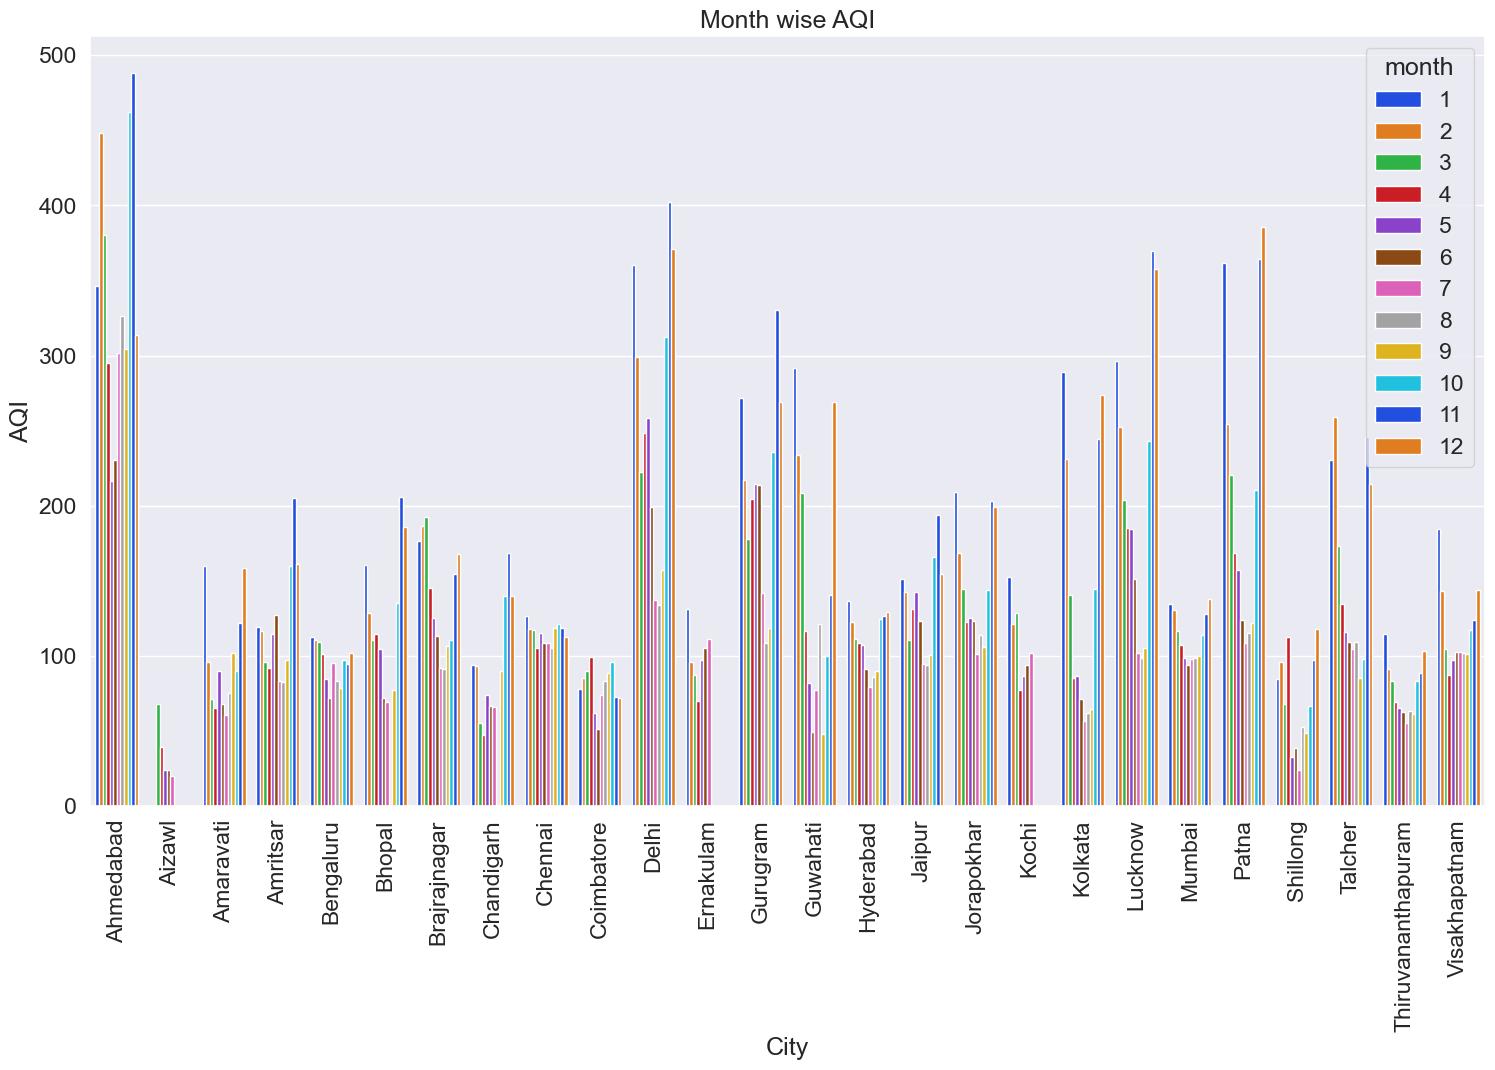

In [74]:

plt.figure(figsize=(18,10))
sns.set(font_scale=1.5)
sns.barplot(x='City', y='AQI', data=month_wise,hue='month',palette = 'bright').set(title ='Month wise AQI')
plt.xticks(rotation=90)
plt.show()


**Tha AQI among most cities spiked on Nov, Dec, Jan & Feb months, Could be an indicator of how the way of celebrating certain festivals(which fall during or close to these months) effect the environment around us.**